## GEARS only performance comparison to multiple null models (Norman)

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
sns.set( font = "Helvetica" )
api = wandb.Api()


# Project is specified by <entity/project-name> please replace it with your project name here:
# runs = api.runs("kexinhuang/pert_gnn_simulation_" + data_name)
runs = api.runs("yroohani/norman_naive")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [45]:
### Make sure the run names match exactly with the wandb names!!

run = 6
pertnet_runs = ['GEARS_seed' + str(i) for i in range(1, run)]
no_perturb_runs = ['no_perturb' + str(i) for i in range(1, run)]
median_baseline_runs = ['median_' + str(i) for i in range(1, run)]
mean_baseline_runs = ['Mean_seed' + str(i) for i in range(1, run)]

In [46]:
res_df = runs_df[runs_df.name.isin(pertnet_runs + no_perturb_runs + median_baseline_runs + mean_baseline_runs)]

In [47]:
res_df

,summary,config,name
0,"{'test_pearson_delta': 0.005421477162776344, '...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",no_perturb5
1,{'test_combo_seen0_mse_top20_de_non_dropout': ...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",no_perturb4
2,{'test_unseen_single_pearson_de': 0.8929357387...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",no_perturb3
3,{'test_combo_seen2_pearson_de': 0.847851829519...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",no_perturb2
4,{'test_combo_seen1_pearson_de': 0.732084401992...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",no_perturb1
5,"{'_step': 37, 'test_de_mse': 0.467154651880264...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",median_4
6,{'test_combo_seen1_mse_de': 0.4433715045452118...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",median_3
7,"{'test_de_mse': 0.44327476620674133, 'test_com...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",median_2
8,{'test_unseen_single_pearson_delta': 0.5411148...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",median_1
9,"{'test_mse': 0.0060422830283641815, 'test_comb...","{'G_go': None, 'device': 'cuda:3', 'num_genes'...",GEARS_seed5


In [48]:
def normalize_name(x):
    if x in pertnet_runs:
        return 'GEARS'
    elif x in median_baseline_runs:
        return 'Median-Baseline'
    elif x in mean_baseline_runs:
        return 'Mean-Baseline'
    else:
        return 'No-Perturb'

In [49]:
metrics = ['test_combo_seen2_mse_top20_de_non_dropout',
          'test_combo_seen1_mse_top20_de_non_dropout',
          'test_unseen_single_mse_top20_de_non_dropout',
          'test_combo_seen0_mse_top20_de_non_dropout'
          ]
metrics_name_map = {'test_combo_seen2_mse_top20_de_non_dropout': '2/2 Seen',
                   'test_combo_seen1_mse_top20_de_non_dropout': '1/2 Seen',
                   'test_combo_seen0_mse_top20_de_non_dropout': '0/2 Seen',
                   'test_unseen_single_mse_top20_de_non_dropout': '0/1 Seen'}
method = []
category = []
result = []
for m in metrics:
    method += [normalize_name(i) for i in res_df.name.values]
    category += [metrics_name_map[m]] * len(res_df)
    result += res_df.summary.apply(lambda x: x[m]).values.tolist()
    
    
out = {}
out['method'] = pd.Series(method)
out['category'] = pd.Series(category)
out['Top 20 DE MSE'] = pd.Series(result)
out = pd.DataFrame(out)

In [50]:
normalize = dict(out[out.method == 'No-Perturb'].groupby('category')['Top 20 DE MSE'].agg(np.mean))

In [51]:
norm = []
for i in out[['category', 'Top 20 DE MSE']].values:
    norm.append(i[1]/normalize[i[0]])

In [52]:
out['Normalized MSE of Top 20 DE Genes'] = norm

In [53]:
out['method'].unique()

array(['No-Perturb', 'Median-Baseline', 'GEARS', 'Mean-Baseline'],
      dtype=object)

In [54]:
color_pal = {
'GEARS': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
'No-Perturb': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
'Median-Baseline': (0.4, 0.7607843137254902, 0.6470588235294118),
'Mean-Baseline': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)}

In [55]:
pal_order = [color_pal[i] for i in pd.DataFrame(out).method.unique()]

In [56]:
import numpy as np
normalize = np.mean(out[out.method == 'No-Perturb']['Top 20 DE MSE'])
out['Normalized MSE of Top 20 DE Genes'] = out['Top 20 DE MSE'].values/normalize

In [58]:
means = out.groupby('method').mean().loc[:, 'Normalized MSE of Top 20 DE Genes']
print((means['Mean-Baseline'] - means['GEARS'])/means['Mean-Baseline'])
print((means['Median-Baseline'] - means['GEARS'])/means['Mean-Baseline'])

0.4057996983870387
0.5887451959098682


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


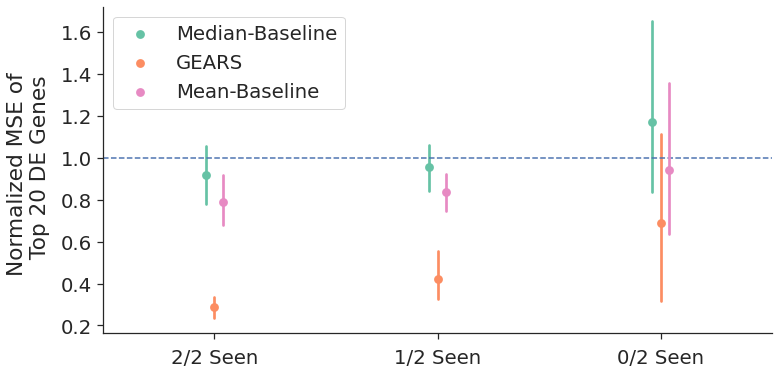

In [57]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.pointplot('category', 'Normalized MSE of Top 20 DE Genes', 
    data=pd.DataFrame(out), 
    order = ['2/2 Seen', '1/2 Seen', '0/2 Seen'], 
    hue = 'method',
    palette= [color_pal['Median-Baseline'], color_pal['GEARS'], color_pal['Mean-Baseline']],         
    dodge=True, 
    join=False,
    hue_order = ['Median-Baseline', 'GEARS', 'Mean-Baseline'])


plt.legend(facecolor='white')

sns.despine()
#g.legend_.remove()
g.set(xlabel=None, )
g.axhline(1, linestyle="dashed")

plt.ylabel("Normalized MSE of \n Top 20 DE Genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
